# Minimal figure creation

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import plot_event_v3_1_mua_ahbeh_speed
from util_load_data import load_data, filter_df_by_dict

Supress pynwb namespace warnings

In [3]:
import warnings 

warnings.filterwarnings('ignore', category=UserWarning, module='hdmf')

## Data Import

After downloading the data [here](https://ucsf.box.com/s/hcma6sk6e5d4vwcsffhovent5xp5fjch),
set `path_to_nwb` and `figure_path` below.

In [9]:
# path_to_nwb = "/home/sambray/Documents/Curvenote/j16_fig_data.nwb"
# figure_path = "/home/sambray/Documents/Curvenote/"
path_to_nwb = "/home/steve/Downloads/j16_fig_data.nwb"
figure_path = "./figure"

# object id's for needed dataframes in the nwb file
df_obj_ids = {
    "events_per_epoch_df": "db6a052e-209e-44b6-b9c0-59b01ac8eaaa",
    "subject_epoch_data": "37965757-b7f0-40d5-b998-cea18f30f196",
    "linear_position_df": "09f142ef-6b99-497d-8b0f-f943126cad05",
    "position_df": "381f5e11-ab9d-44eb-8157-6eff715da79c",
    "acausal_results_summary": "59971f10-164b-4c2c-be2d-b73452e123e3",
    "mua": "63de6b0a-dac9-45f7-9e11-6412ec71e0b8",
}

dataframes, events_per_epoch_df = load_data(path_to_nwb, df_obj_ids)

In [10]:
events_per_epoch_df

index     nwb_file_name interval_list_name  epoch  trial  \
id                                                              
0        0  j1620210707_.nwb  pos 1 valid times      2      1   
1        1  j1620210707_.nwb  pos 1 valid times      2      1   
2        2  j1620210707_.nwb  pos 1 valid times      2      1   
3        3  j1620210707_.nwb  pos 1 valid times      2      1   
4        4  j1620210707_.nwb  pos 1 valid times      2      1   
..     ...               ...                ...    ...    ...   
389    389  j1620210707_.nwb  pos 1 valid times      2    177   
390    390  j1620210707_.nwb  pos 1 valid times      2    177   
391    391  j1620210707_.nwb  pos 1 valid times      2    177   
392    392  j1620210707_.nwb  pos 1 valid times      2    178   
393    393  j1620210707_.nwb  pos 1 valid times      2    179   

     time_slice_start  time_slice_stop  is_first_seg_of_trial  \
id                                                              
0                5804             8636                   True   
1                5804             8636                   True   
2                5804             8636                  False   
3                5804             8636                  False   
4                5804             8636                  False   
..                ...              ...                    ...   
389            766774           768411                   True   
390            766774           768411                  False   
391            766774           768411                  False   
392            771469           773408                  False   
393            773901           775922                  False   

     is_last_seg_of_trial  event_num_in_trial  event_start_t  event_stop_t  \
id                                                                           
0                      -2                   0   1.625675e+09  1.625675e+09   
1                      -2                   1   1.625675e+09  1.625675e+09   
2                      -1                   0   1.625675e+09  1.625675e+09   
3                      -1                   1   1.625675e+09  1.625675e+09   
4                      -1                   2   1.625675e+09  1.625675e+09   
..                    ...                 ...            ...           ...   
389                    -2                   1   1.625677e+09  1.625677e+09   
390                    -1                   0   1.625677e+09  1.625677e+09   
391                    -1                   1   1.625677e+09  1.625677e+09   
392                    -1                   0   1.625677e+09  1.625677e+09   
393                    -1                   0   1.625677e+09  1.625677e+09   

     event_start_t_manual  event_stop_t_manual  candidate_plot_event  
id                                                                    
0            1.625675e+09         1.625675e+09                     0  
1            1.625675e+09         1.625675e+09                     0  
2            1.625675e+09         1.625675e+09                     0  
3            1.625675e+09         1.625675e+09                     0  
4            1.625675e+09         1.625675e+09                     0  
..                    ...                  ...                   ...  
389          1.625677e+09         1.625677e+09                     0  
390          1.625677e+09         1.625677e+09                     0  
391          1.625677e+09         1.625677e+09                     0  
392          1.625677e+09         1.625677e+09                     0  
393          1.625677e+09         1.625677e+09                     0  

[394 rows x 15 columns]

## Plotting args

Set various args for matplotlib, as well as `save_fig`.

In [11]:
plotting_kwargs = dict(
    fig_path=figure_path,
    nonlocal_cmap="custom",
    default_cmap="PuBu",
    shading_named_color="cornflowerblue",
    arrow_color="dimgrey",
    peri_nonlocal_time=0.3,
    use_manual=True,
    extra_hpd=False,
    show_cbar_ticks=False,
    min_nonlocal_duration_s=0.02,
    between_bin_buffer_s=0.004,
    save_fig=False,
)

# Plot data

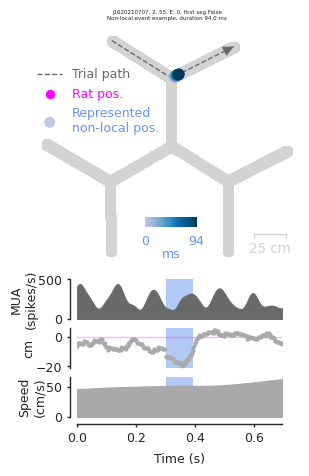

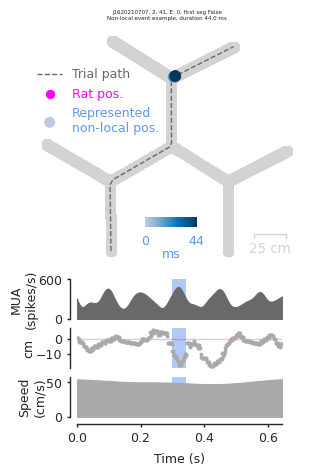

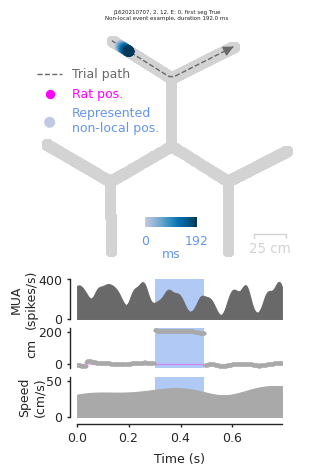

In [12]:
trial_seg_events = [
    dict(trial=55, is_first_seg_of_trial=False, event_num_in_trial=0),
    dict(trial=41, is_first_seg_of_trial=False, event_num_in_trial=0),
    dict(trial=12, is_first_seg_of_trial=True, event_num_in_trial=0),
]

for trial_dict in trial_seg_events:
    event_dict = filter_df_by_dict(events_per_epoch_df, trial_dict)
    plot_event_v3_1_mua_ahbeh_speed(
        event_dict,
        **dataframes,
        **plotting_kwargs,
    )
